In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  

In [2]:
df_socialmedia_dataset_orginal = pd.read_csv('socialmedia_dataset_orginal.csv')

In [3]:
df_socialmedia_dataset_orginal.head (3)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0


In [4]:
socialmedia_clean = df_socialmedia_dataset_orginal.copy()

In [5]:
socialmedia_clean['Wellbeing_Score'] = (
    socialmedia_clean['Happiness_Index(1-10)'] +
    socialmedia_clean['Sleep_Quality(1-10)'] +
    socialmedia_clean['Exercise_Frequency(week)'] +
    (11 - socialmedia_clean['Stress_Level(1-10)'])
)

In [6]:
socialmedia_clean.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)', 'Wellbeing_Score'],
      dtype='object')

## Create new additional column Stress_Level_Binary where 0= low stress (1-5) 1= high stress (6-10)

In [7]:
#value is 1, otherwise 0, where 0= low stress (1-5) 1= high stress (6-10)
#code checks every single value within the selected column against the number 6.
#if the person's stress level in the original DataFrame was 6 or higher > True, otherwise > False
Stress_Level_Binary = socialmedia_clean['Stress_Level(1-10)'] >= 6

In [8]:
#converts a series of True/False values (Boolean values) into a new column containing only binary integers (1 and 0) corresponding to high and low values 
socialmedia_clean['Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))'] = np.where(Stress_Level_Binary, 1, 0)

In [9]:
#check DataFrame
socialmedia_clean.head (3)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10),Wellbeing_Score,"Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))"
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0,27.0,1
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0,23.0,1
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0,19.0,1


In [10]:
#output all the column headers 
socialmedia_clean.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)', 'Wellbeing_Score',
       'Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))'],
      dtype='object')

## Create DataFrame for ML

In [11]:
#creates a new copy of the DataFrame and remove a specified column Stress_Level(1-10)
socialmedia_clean_ML = socialmedia_clean.drop(columns=['Stress_Level(1-10)'], inplace=False) 

In [12]:
#output all the column headers
socialmedia_clean_ML.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Days_Without_Social_Media',
       'Exercise_Frequency(week)', 'Social_Media_Platform',
       'Happiness_Index(1-10)', 'Wellbeing_Score',
       'Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))'],
      dtype='object')

## Create heatmap under H3. Correlation heatmap of the linear relationship between Stress and other numerical factors (like Screen Time, Sleep Quality, Exercise Frequency) 

In [13]:
#for hiphofize #3 calculates the pairwise correlation between each column in the selected subset
h3 = socialmedia_clean[['Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)',
    'Exercise_Frequency(week)', 'Happiness_Index(1-10)', 'Stress_Level(1-10)'
                       ]].corr()

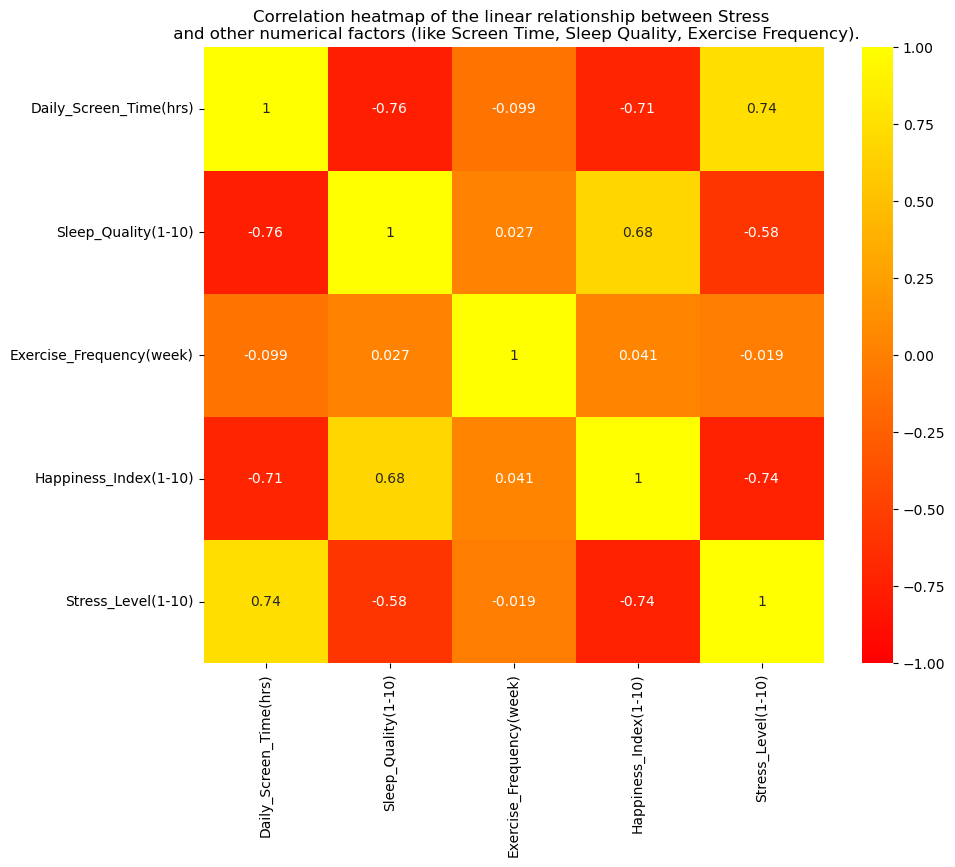

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(h3, annot=True, cmap='autumn', vmin=-1, vmax=1)
plt.title('Correlation heatmap of the linear relationship between Stress \n and other numerical factors (like Screen Time, Sleep Quality, Exercise Frequency).')
plt.savefig("heatmap.png")
plt.show()

### KEY OBSERVATIONS:
# ------------------
#### Correlation heatmap of the linear relationship between Stress and other numerical factors (like Screen Time, Sleep Quality, Exercise Frequency) 
#### - values within the cells range from -1 to +1
#### 1. for a correlation coefficient of +1 (or very close to +1) indicates a perfect positive linear correlation
####    for instance,     the more time a student spends studying, the higher their test scores are likely to be
#### 2. for a correlation coefficient -1 (or a value close to -1) indicates a perfect negative linear correlation
####    for instance,     the more a student spends using social media, the less their ability to concentrate and the worse their performance
#### 3. when the correlation coefficient value is 0 (or very close to 0), it means that there is a weak or no linear relation between the two variables
####    for instance,     your shoe size has no linear relationship to what grade you can get on a project defense
#### -----------------
### Negative correlation
#### Daily_Screen_Time and Sleep_Quality (-0.76): a strong trend towards decreased sleep quality with increasing daily screen time.
#### Daily_Screen_Time and Happiness_Index (-0.71): more screen time is associated with significantly lower indices of happiness
#### Sleep_Quality(1-10) and Stress_Level(1-10) (-0.58): better sleep quality is associated with lower stress levels
### Positive correlation
#### Daily_Screen_Time(hrs) and Stress_Level(1-10) (0.74): indicates a strong relationship where higher daily screen time hours are associated with higher stress levels.
#### Sleep_Quality and Happiness_Index (0.68): good sleep is positively associated with feelings of happiness.
### Weak or no linear relation
#### Exercise_Frequency and Stress_Level (-0.019): interestingly, in this data set, there is almost no linear relationship between exercise frequency and stress level. They do not influence each other a predictable way, making this chart seem like an excuse for lazy people
#### Exercise_Frequency and Sleep_Quality (0.027): similarly, there is a very weak relationship between these two variables
### The heatmap shows that sleep quality and daily screen time have the greatest impact on subjective measures of stress, happiness, and well-being
### these factors have significantly stronger correlations than any other modified models

### alona please check and continue from here ###



The correlation heatmap shows how various lifestyle factors relate to stress levels and well-being. Correlation values range from -1 to +1, where values closer to 1 or -1 indicate strong relationships, and values near 0 suggest weak or no connection.

Understanding the Results:
The analysis identified several essential patterns. Screen time emerged as another critical factor, showing strong negative correlations with sleep quality (-0.76) and happiness (-0.71). This indicates that increased daily screen time is associated with worse sleep, reduced happiness, and diminished overall well-being.
On the positive side, happiness and well-being showed a very strong association (0.87), confirming that happier individuals tend to report better overall well-being. 

Sleep quality also showed strong positive relationships with both well-being (0.81) and happiness (0.68), suggesting that good sleep quality is a fundamental component of mental wellness.

Surprisingly, exercise frequency showed almost no linear relationship with stress levels (-0.019) or sleep quality (0.027). This was unexpected, as exercise is commonly believed to reduce stress and improve sleep. The weak correlations suggest that in this dataset, the relationship between exercise and these well-being factors may be more complex than a simple linear pattern, or other factors may be more influential.

Main Conclusion:
Sleep quality and screen time emerged as the two most significant predictors of stress, happiness, and overall well-being in this analysis. Their correlations were substantially stronger than exercise frequency, indicating these factors should be prioritized when developing strategies to improve mental wellness and reduce stress levels.